In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("data.csv")

In [3]:
def check_df(dataframe, head=5):
    print('################# Columns ################# ')
    print(dataframe.columns)
    print('################# Types  ################# ')
    print(dataframe.dtypes)
    print('##################  Head ################# ')
    print(dataframe.head(head))
    print('#################  Shape ################# ')
    print(dataframe.shape)
    print('#################  NA ################# ')
    print(dataframe.isnull().sum())
    print('#################  Quantiles ################# ')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99]).T)


check_df(df)

################# Columns ################# 
Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')
################# Types  ################# 
Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object
##################  Head ################# 
  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium 

## Data preparation

In [4]:
selected_columns = [
    "Make", "Model", "Year", "Engine HP", "Engine Cylinders",
    "Transmission Type", "Vehicle Style", "highway MPG", "city mpg", "MSRP"
]
df = df[selected_columns]

df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [5]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [6]:
df.fillna(0, inplace=True)

In [7]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [8]:
average_msrp = df["msrp"].mean()
df["above_average"] = (df["msrp"] > average_msrp).astype(int)

In [9]:
df.head(10)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0
5,BMW,1 Series,2012,230.0,6.0,MANUAL,Coupe,28,18,31200,0
6,BMW,1 Series,2012,300.0,6.0,MANUAL,Convertible,26,17,44100,1
7,BMW,1 Series,2012,300.0,6.0,MANUAL,Coupe,28,20,39300,0
8,BMW,1 Series,2012,230.0,6.0,MANUAL,Convertible,28,18,36900,0
9,BMW,1 Series,2013,230.0,6.0,MANUAL,Convertible,27,18,37200,0


## Split the data

In [10]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

print("Train data shape:", df_train.shape)
print("Validation data shape:", df_val.shape)
print("Test data shape:", df_test.shape)

Train data shape: (7148, 11)
Validation data shape: (2383, 11)
Test data shape: (2383, 11)


In [11]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
5727,Toyota,Highlander Hybrid,2016,280.0,6.0,AUTOMATIC,4dr SUV,28,27,50485,1
5814,Chevrolet,Impala Limited,2014,300.0,6.0,AUTOMATIC,Sedan,30,18,26840,0
8450,Buick,Regal,2016,259.0,4.0,AUTOMATIC,Sedan,27,19,36490,0
2396,Volkswagen,CC,2015,280.0,6.0,AUTOMATED_MANUAL,Sedan,25,17,43575,1
5494,Dodge,Grand Caravan,2016,283.0,6.0,AUTOMATIC,Passenger Minivan,25,17,22595,0


In [12]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values


df_train = df_train.drop(columns=['msrp', 'above_average'])
df_val = df_val.drop(columns=['msrp', 'above_average'])
df_test = df_test.drop(columns=['msrp', 'above_average'])

In [13]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,Toyota,Highlander Hybrid,2016,280.0,6.0,AUTOMATIC,4dr SUV,28,27
1,Chevrolet,Impala Limited,2014,300.0,6.0,AUTOMATIC,Sedan,30,18
2,Buick,Regal,2016,259.0,4.0,AUTOMATIC,Sedan,27,19
3,Volkswagen,CC,2015,280.0,6.0,AUTOMATED_MANUAL,Sedan,25,17
4,Dodge,Grand Caravan,2016,283.0,6.0,AUTOMATIC,Passenger Minivan,25,17


In [14]:
df_val.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,Nissan,370Z,2015,350.0,6.0,AUTOMATIC,Coupe,26,19
1,Pontiac,Firebird,2000,305.0,8.0,UNKNOWN,2dr Hatchback,23,15
2,Acura,RDX,2015,273.0,6.0,AUTOMATIC,4dr SUV,27,19
3,Kia,Sedona,2016,276.0,6.0,AUTOMATIC,Passenger Minivan,24,18
4,Nissan,Truck,1996,134.0,4.0,MANUAL,Regular Cab Pickup,24,19


In [15]:
df_test.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,Lotus,Evora 400,2017,400.0,6.0,MANUAL,Coupe,39,21
1,Aston Martin,V8 Vantage,2014,420.0,8.0,AUTOMATED_MANUAL,Convertible,21,14
2,Hyundai,Genesis,2015,311.0,6.0,AUTOMATIC,Sedan,29,18
3,Suzuki,Samurai,1993,66.0,4.0,MANUAL,Convertible SUV,26,24
4,Mitsubishi,Outlander,2015,166.0,4.0,AUTOMATIC,4dr SUV,29,24


### Question 1: ROC AUC feature importance
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

- For each numerical variable, use it as score and compute AUC with the above_average variable
- Use the training dataset for that
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- engine_hp
- engine_cylinders
- highway_mpg
- city_mpg

In [12]:
# Defining the list of numerical variables to evaluate

numerical_vars = ["engine_hp", "engine_cylinders", "highway_mpg", "city_mpg"]

In [13]:
highest_auc = 0  
best_variable = None

for variable in numerical_vars:
    auc = roc_auc_score(y_train, df_train[variable])
    
    # Checking if AUC is less than 0.5 and invert the variable if needed
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[variable])
    
    if auc > highest_auc:
        highest_auc = auc
        best_variable = variable

print("The numerical variable with the highest AUC:", best_variable)

The numerical variable with the highest AUC: engine_hp


### Question 2: Training the model
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.678
- 0.779
- 0.878
- 0.979

In [16]:
# One-hot encoding
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [17]:
# training the logistic regression model

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [20]:
# Transforming the validation dataset and calculate AUC

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)[:, 1]

In [21]:
# Calculating AUC

auc = roc_auc_score(y_val, y_pred)
round(auc, 3)

0.979

### Question 3: Precision and Recall
Now let's compute precision and recall for our model.

- Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
- For each threshold, compute precision and recall
- Plot them

At which threshold precision and recall curves intersect?

- 0.28
- 0.48
- 0.68
- 0.88

C:\Users\Murat Kiran\AppData\Local\Temp\ipykernel_6304\3715714332.py:16: RuntimeWarning: invalid value encountered in scalar divide
  precision = true_positives / (true_positives + false_positives)


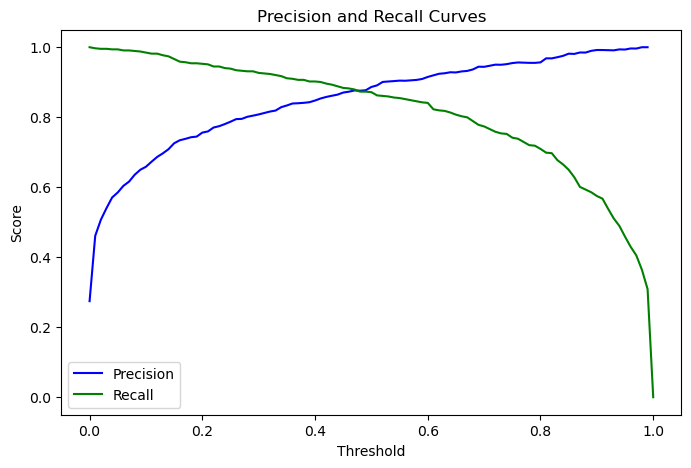

In [18]:
# Defining a range of thresholds from 0.0 to 1.0 with a step of 0.01
thresholds = np.arange(0.0, 1.01, 0.01)


precision_scores = []
recall_scores = []

# Calculating precision and recall for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_pred >= threshold).astype(int)
    true_positives = np.sum((y_val == 1) & (y_pred_threshold == 1))
    false_positives = np.sum((y_val == 0) & (y_pred_threshold == 1))
    false_negatives = np.sum((y_val == 1) & (y_pred_threshold == 0))
    
    # Calculating precision and recall
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    
    precision_scores.append(precision)
    recall_scores.append(recall)


plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision_scores, label='Precision', color='b')
plt.plot(thresholds, recall_scores, label='Recall', color='g')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall Curves')
plt.legend(loc='best')


In [19]:
# Finding the threshold where precision and recall curves intersect

intersection_threshold = thresholds[np.argwhere(np.isclose(precision_scores, recall_scores, atol=0.01))[0][0]]
print(intersection_threshold)

0.46


### Question 4: F1 score
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.12
- 0.32
- 0.52
- 0.72

In [20]:
f1_scores = []

thresholds = np.arange(0.0, 1.01, 0.01)

for threshold in thresholds:
    y_pred_threshold = (y_pred >= threshold).astype(int)
    f1 = f1_score(y_val, y_pred_threshold)
    f1_scores.append(f1)

# Finding the threshold at which F1 score is maximal
max_f1_threshold = thresholds[np.argmax(f1_scores)]

print(f"The threshold at which F1 score is maximal is: {max_f1_threshold:.2f}")


The threshold at which F1 score is maximal is: 0.52


### Question 5: 5-Fold CV
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)
- Iterate over different folds of df_full_train
- Split the data into train and validation
- Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
- Use AUC to evaluate the model on validation

How large is standard devidation of the scores across different folds?

- 0.003
- 0.030
- 0.090
- 0.140

In [21]:
# Initialize KFold with 5 splits and random shuffle
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize an empty list to store the AUC scores
auc_scores = []

for train_idx, val_idx in kf.split(df_full_train):
    # Split data into train and validation sets
    train_fold = df_full_train.iloc[train_idx]
    val_fold = df_full_train.iloc[val_idx]

    # Prepare the data for training and validation
    y_train_fold = train_fold.above_average.values
    y_val_fold = val_fold.above_average.values

    train_dict = train_fold.drop(columns=['above_average', 'msrp']).to_dict(orient='records')
    val_dict = val_fold.drop(columns=['above_average', 'msrp']).to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train_fold = dv.fit_transform(train_dict)
    X_val_fold = dv.transform(val_dict)

    # Train the logistic regression model
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set and calculate AUC
    y_pred_fold = model.predict_proba(X_val_fold)[:, 1]
    auc_fold = roc_auc_score(y_val_fold, y_pred_fold)
    auc_scores.append(auc_fold)

# Calculate the standard deviation of the AUC scores
std_deviation = np.std(auc_scores)

std_deviation


0.0024970168238553905

### Question 6: Hyperparemeter Tuning
Now let's use 5-Fold cross-validation to find the best parameter C

- Iterate over the following C values: [0.01, 0.1, 0.5, 10]
- Initialize KFold with the same parameters as previously
- Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
- Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

- 0.01
- 0.1
- 0.5
- 10

In [23]:
# Defining a function to train the model
def train(df_train, y_train, C=1.0):
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(df_train.to_dict(orient='records'))

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

# Defining a function to make predictions
def predict(df, dv, model):
    X = dv.transform(df.to_dict(orient='records'))
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred


In [24]:
from tqdm.auto import tqdm

n_splits = 5

C_values = [0.01, 0.1, 0.5, 10]

best_mean_score = None
best_std_score = None
best_C = None

for C in tqdm(C_values):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    mean_score = np.mean(scores)
    std_score = np.std(scores)

    if best_mean_score is None or mean_score > best_mean_score:
        best_mean_score = mean_score
        best_std_score = std_score
        best_C = C

print(f"Best C: {best_C}, Mean Score: {best_mean_score:.3f}, Std: {best_std_score:.3f}")



  0%|          | 0/4 [00:00<?, ?it/s]

Best C: 0.01, Mean Score: 1.000, Std: 0.000
